In [1]:
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd

import tensorflow as tf

import os

import scipy

import tensorflow.compat.v2 as tf


from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential, Model, load_model

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.layers import Conv1D,Conv2D,Add

from tensorflow.keras.layers import MaxPool1D, MaxPooling2D

from sklearn import metrics

from sklearn.preprocessing import LabelEncoder

from tensorflow import keras as k

In [2]:
mrc_data=pd.read_csv('emotions.csv')

print(mrc_data)

      # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
0          4.620      30.3    -356.0     15.60      26.3       1.070   
1         28.800      33.1      32.0     25.80      22.8       6.550   
2          8.900      29.4    -416.0     16.70      23.7      79.900   
3         14.900      31.6    -143.0     19.80      24.3      -0.584   
4         28.300      31.3      45.2     27.30      24.5      34.800   
...          ...       ...       ...       ...       ...         ...   
2127      32.400      32.2      32.2     30.80      23.4       1.640   
2128      16.300      31.3    -284.0     14.30      23.9       4.200   
2129      -0.547      28.3    -259.0     15.80      26.7       9.080   
2130      16.800      19.9    -288.0      8.34      26.0       2.460   
2131      27.000      32.0      31.8     25.00      28.9       4.990   

      mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  \
0          0.411     -15.700       2.060        3.15  ...      

In [3]:
smp_data=mrc_data.loc[:,'fft_0_a':'fft_749_a']

In [4]:
le=LabelEncoder()
mrc_data['label']=le.fit_transform(mrc_data['label'])

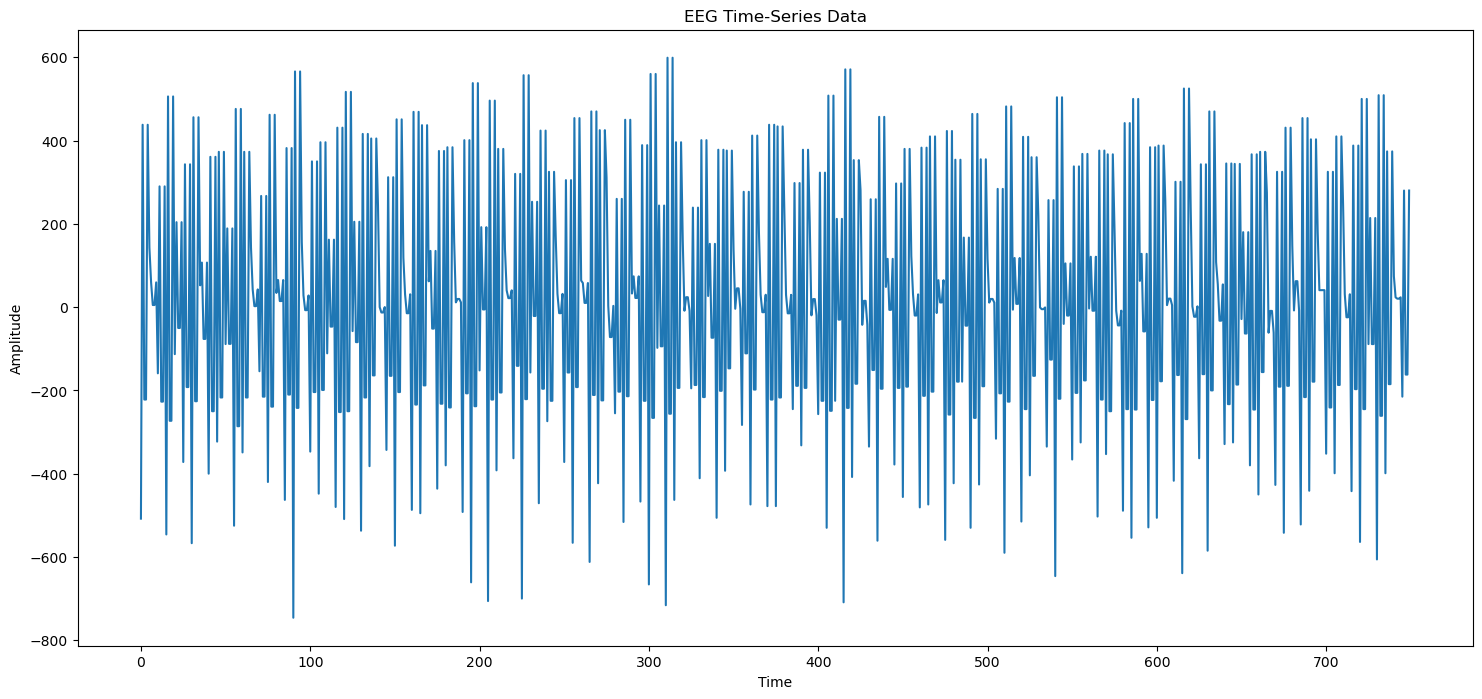

In [5]:
sample = mrc_data.loc[0, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(18, 8))
plt.plot(range(len(sample)), sample)
plt.title("EEG Time-Series Data")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [6]:
y=mrc_data.pop('label')

X=mrc_data

X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=55)

X_train=np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))

X_test=np.array(X_test).reshape((X_test.shape[0],X_test.shape[1],1))

y_train=pd.get_dummies(y_train)

y_test=pd.get_dummies(y_test)

In [7]:
from tensorflow.keras.layers import Dense, Flatten, Dropout,Activation,LSTM,ReLU,Reshape,Bidirectional,BatchNormalization,Input,concatenate,PReLU

inps=tf.keras.Input(shape=(X_train.shape[1],1))

gru=tf.keras.layers.GRU(256,return_sequences=True)(inps)

flt=Flatten()(gru)

out=Dense(3, activation='softmax')(flt)

model=tf.keras.Model(inps,out)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 2548, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 2548, 256)           │         198,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 652288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │       1,956,867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,779 (8.22 MB)

 Trainable params: 2,155,779 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow import keras

def train_model(model,X_train,  y_train,X_test,y_test, save_to, epoch=2):

        kadam=keras.optimizers.Adam(learning_rate=0.001)

        es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

        mc=ModelCheckpoint(save_to+'_best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

        LRS_Schule=tf.keras.callbacks.LearningRateScheduler(lambda epoch:0.001*np.exp(-epoch/10.))


        model.compile(optimizer=kadam,loss=['categorical_crossentropy'],metrics=['accuracy'])

        his=model.fit(X_train,y_train,batch_size=32,epochs=epoch,validation_data=(X_test,y_test),callbacks=[es,mc,LRS_Schule])

        saved_model=load_model(save_to+'_best_model.keras')

        return model,his

In [ ]:
model,his=train_model(model,X_train, y_train, X_test, y_test, save_to ='./', epoch=10)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.6241 - loss: 77.5721 
Epoch 1: val_accuracy improved from -inf to 0.92506, saving model to ./_best_model.keras
54/54 ━━━━━━━━━━━━━━━━━━━━ 709s 13s/step - accuracy: 0.6269 - loss: 76.7825 - val_accuracy: 0.9251 - val_loss: 3.8342 - learning_rate: 0.0010
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.8894 - loss: 7.3572 
Epoch 2: val_accuracy improved from 0.92506 to 0.95785, saving model to ./_best_model.keras
54/54 ━━━━━━━━━━━━━━━━━━━━ 748s 14s/step - accuracy: 0.8896 - loss: 7.3443 - val_accuracy: 0.9578 - val_loss: 2.5998 - learning_rate: 9.0484e-04
Epoch 3/10
29/54 ━━━━━━━━━━━━━━━━━━━━ 4:57 12s/step - accuracy: 0.9795 - loss: 0.6764